### Import Libraries

Import libraries for data handling, modeling, hyperparameter tuning, and model evaluation.

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Load Data

Load training and test datasets. Separate features and target (`Default` column) for training and testing.

In [2]:
#load data
train_df=pd.read_csv('../cleaned_data/train_data.csv')
test_df=pd.read_csv('../cleaned_data/test_data.csv')

In [3]:
y_train=train_df['Default']
X_train=train_df.drop(columns=['Default'])
y_test=test_df['Default']
X_test=test_df.drop(columns=['Default'])
X_train.shape

(163421, 31)

### Initialize Model and Set Hyperparameters

Initialize `XGBClassifier` with a seed. Set parameter grid for tuning.

### Hyperparameter Tuning with RandomizedSearchCV

Perform randomized search for hyperparameters with 8-fold cross-validation. Fit to training data and save the best model.

### Evaluate the Model

Predict on `X_test` and compute accuracy.

In [4]:
model=XGBClassifier(seed=42)
param_grid={
    'n_estimators':[80,100],
    'max_depth':[3,5,7,10],
    'learning_rate':[0.01,0.1,0.2]
}
grid_search=RandomizedSearchCV(estimator=model,param_distributions=param_grid,
                               n_iter=80,cv=8,verbose=0,
                               random_state=42,n_jobs=-1)
grid_search.fit(X_train,y_train)
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

/home/rudrap/AIM511---Project/ml/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 24 is smaller than n_iter=80. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/rudrap/AIM511---Project/ml/lib/python3.12/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.8855002937145094

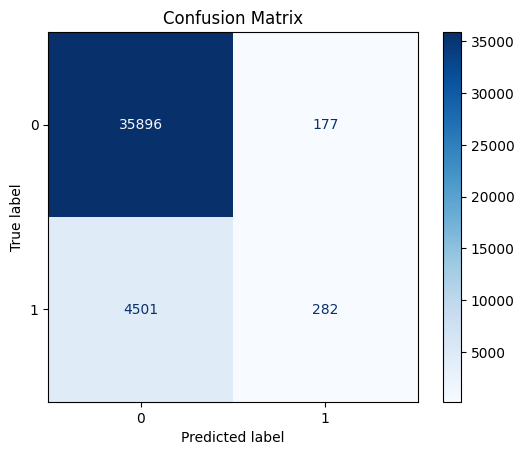

In [8]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

### Refitting on Entire Test Data for Final Prediction

Refit `best_model` on the test dataset for final prediction.

### Load New Data and Prepare for Prediction

Load final test dataset, save `LoanID`, and one-hot encode categorical features.
### Generate Predictions and Write to File

Generate predictions on `final_test` and save `LoanID` with predictions to `xgboost_predictions.csv`.

In [ ]:
final_test=pd.read_csv('../data/test.csv')
loan_id_lists=final_test['LoanID']
final_test.drop(columns=['LoanID'],inplace=True)    
#one hot encode the test data
final_test=pd.get_dummies(final_test,columns=final_test.select_dtypes(include=['object','category']).columns,dtype=int)

final_pred=best_model.predict(final_test)
#write the prediction 
with open('xgboost_predictions.csv','w') as f:
    f.write("LoanID,Default\n")
    for i in range(final_test.shape[0]):
        f.write(f'{loan_id_lists[i]},{final_pred[i]}\n')